### 1. load the used packages

In [1]:
import os # get or change the file path
import glob # track all objective file path
from PIL import Image # used for visualization
import matplotlib.pyplot as plt # used for visualization
import cv2 # used for visualization
import numpy as np


### 2. get the workspace path

In [2]:
# record current path
origin_path = os.getcwd()
# change the path to the dataset folder
# os.chdir('../../../grasping_dataset/Conell_grasping_dataset')
os.chdir('../../../grasping_dataset/Conell_grasping_dataset')
# check if the current folder is dataset folder
data = os.listdir()
data.sort()
# use "\n" to split every element of list or tuple
print("\n".join(data))

01
02
03
04
05
06
07
08
09
10
backgrounds


### 3. check the dataset file path

In [3]:
# check one of these folders
os.chdir('01')
os.listdir()

['pcd0116d.tiff',
 'pcd0115cneg.txt',
 'pcd0184d.tiff',
 'pcd0179d.tiff',
 'pcd0112.txt',
 'pcd0111cneg.txt',
 'pcd0177r.png',
 'pcd0115.txt',
 'pcd0158d.tiff',
 'pcd0119cneg.txt',
 'pcd0152cpos.txt',
 'pcd0146r.png',
 'pcd0137d.tiff',
 'pcd0169.txt',
 'pcd0156cpos.txt',
 'pcd0124r.png',
 'pcd0179cpos.txt',
 'pcd0132cneg.txt',
 'pcd0189cpos.txt',
 'pcd0167.txt',
 'pcd0136cneg.txt',
 'pcd0154d.tiff',
 'pcd0186r.png',
 'pcd0185cpos.txt',
 'pcd0160.txt',
 'pcd0175cpos.txt',
 'pcd0171cpos.txt',
 'pcd0115r.png',
 'pcd0181cpos.txt',
 'pcd0188d.tiff',
 'pcd0175d.tiff',
 'pcd0184.txt',
 'pcd0110cpos.txt',
 'pcd0155.txt',
 'pcd0109r.png',
 'pcd0142r.png',
 'pcd0121d.tiff',
 'pcd0129.txt',
 'pcd0114cpos.txt',
 'pcd0157cneg.txt',
 'pcd0100d.tiff',
 'pcd0192d.tiff',
 'pcd0183.txt',
 'pcd0118cpos.txt',
 'pcd0152.txt',
 'pcd0173r.png',
 'pcd0138r.png',
 'pcd0153cneg.txt',
 'pcd0137cpos.txt',
 'pcd0120.txt',
 'pcd0111r.png',
 'pcd0178cneg.txt',
 'pcd0163d.tiff',
 'pcd0188cneg.txt',
 'pcd0133cpos.txt'

#### cornell grasping dataset explanation
- pcd****.txt :样本对应的点云文件
- pcd****cneg.txt :样本的失败抓取框标注
- pcd****cpos.txt :样本的正确抓取标注
- pcd****r.png :样本的RGB图像
- **pcd****d.tiff :由点云生成的样本深度图像（数据集中本不包含此文件，自己写程序生成，具体的程序gg-cnn中有给出）**

#### exeplanation of PCD format point cloud data file
    # .PCD v.7 - Point Cloud Data file format
    VERSION .7
    FIELDS x y z rgb
    SIZE 4 4 4 4
    TYPE F F F F
    COUNT 1 1 1 1
    WIDTH 213
    HEIGHT 1
    VIEWPOINT 0 0 0 1 0 0 0
    POINTS 213
    DATA ascii
    0.93773 0.33763 0 4.2108e+06
    0.90805 0.35641 0 4.2108e+06
- VERSION –指定PCD文件版本
- FIELDS –指定一个点可以有的每一个维度和字段的名字 x y z and rgb value
- SIZE –用字节数指定每一个维度的大小 float data 4 byte
- TYPE –用一个字符指定每一个维度的类型 I –表示有符号类型  U – 表示无符号类型uint8 F –表示浮点类型
- COUNT –指定每一个维度包含的元素数目
- WIDTH –用点的数量表示点云数据集的宽度 它能确定无序数据集的点云中点的个数
- HEIGHT –用点的数目表示点云数据集的高度 对于无序数据集它被设置成1
- VIEWPOINT–指定数据集中点云的获取视点  视点信息被指定为平移（txtytz）+四元数（qwqxqyqz）    
- DATA –指定存储点云数据的数据类型 以ASCII形式，每一点占据一个新行： p_1 p_2 ... p_n
    

- 有序点云：一般由深度图还原的点云，有序点云按照图方阵一行一行的，从左上角到右下角排列，当然其中有一些无效点因为。有序点云按顺序排列，可以很容易的找到它的相邻点信息。有序点云在某些处理的时候还是很便利的，但是很多情况下是无法获取有序点云的。

- 无序点云：无序点云就是其中的点的集合，点排列之间没有任何顺序，点的顺序交换后没有任何影响。是比较普遍的点云形式，有序点云也可看做无序点云来处理。

### 4. get the path of every kind images

In [4]:
# change to the workspace path
os.chdir(origin_path)
# save the cornell grasping dataset
cornell_path = '../../../grasping_dataset/Conell_grasping_dataset'
cpos_path = glob.glob(os.path.join(cornell_path, '*', 'pcd*cpos.txt'))
cpos_path.sort()
# data_path store all path of pcd*cpos.txt kind files

- 在数据集中可以将同一类文件的路径全部追踪出来便于数据载入
- 由于数据集的命名十分有规律因此我们可以将所有类型的数据全都载入到列表中
- 方法是将对应类型名进行替换

In [5]:
rgb_path = [filename.replace('cpos.txt', 'r.png') for filename in cpos_path]
depth_path = [filename.replace('cpos.txt', 'd.tiff') for filename in cpos_path]
cneg_path = [filename.replace('cpos.txt', 'cneg.txt') for filename in cpos_path]
potcld_path = [filename.replace('cpos.txt', '.txt') for filename in cpos_path]

### 5. image visualization

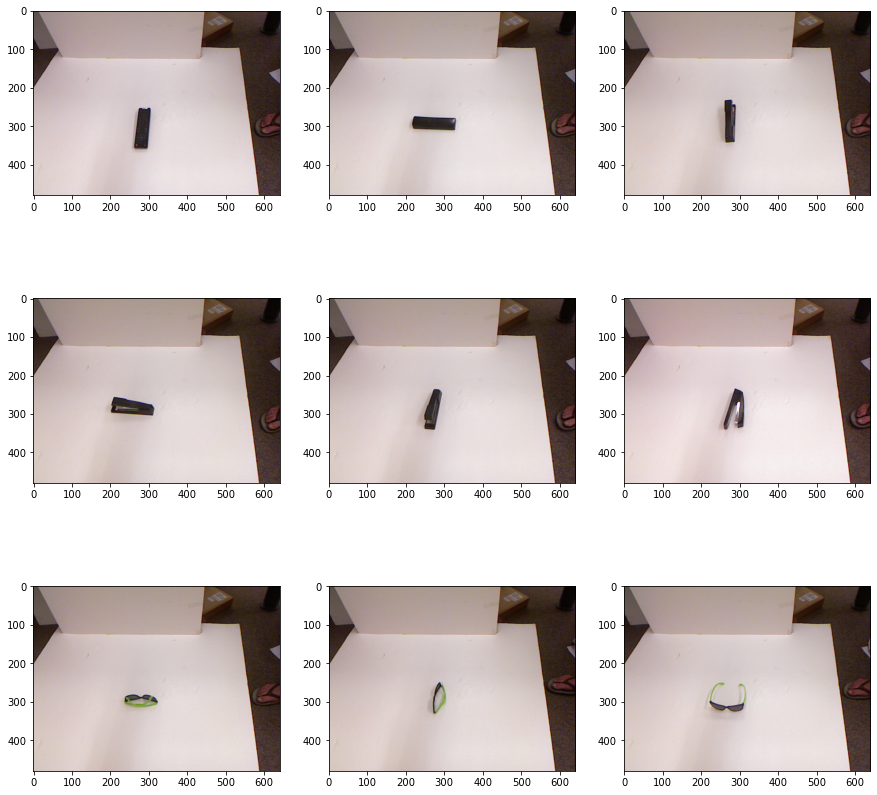

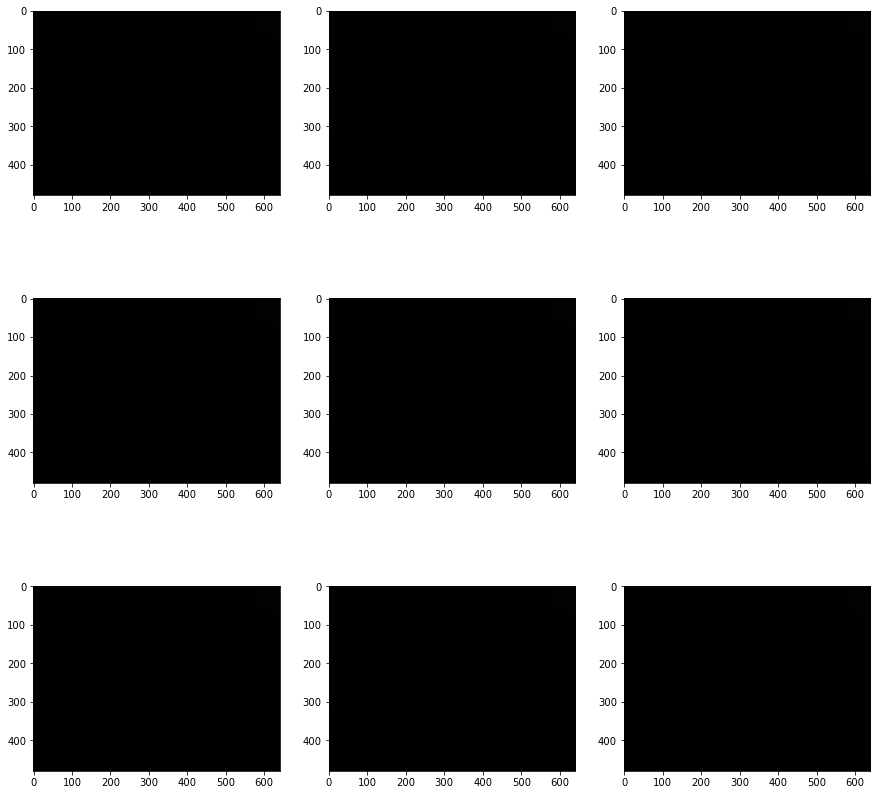

In [6]:
# images visualization
plt.figure(figsize=(15,15))
for i in range(9):
    img = Image.open(rgb_path[i])
    plt.subplot(331+i)
    plt.imshow(img)
plt.show()

plt.figure(figsize=(15,15))
for i in range(9):
    img = Image.open(depth_path[i])
    plt.subplot(331+i)
    plt.imshow(img)
plt.show()

### 6. grasping rectangle visualization

In [7]:
def str2num(point):
    '''
    :功能  :将字符串类型存储的抓取框脚点坐标取整并以元组形式返回
    
    :参数  :point,字符串，以字符串形式存储的一个点的坐标
    :返回值 :列表，包含int型抓取点数据的列表[x,y]
    '''
    x,y = point.split()
    x,y = int(round(float(x))), int(round(float(y)))

    return (x,y)

读取的数据点的格式（一行为一个点，四个点构成一个抓去矩形）：  
['253 319.7',  
 '309 324',  
 '307 350',  
 '251 345.7',  
 '255 324.877',  
 '308 332',  
 '313 295',  
 '260 287.877',  
 '260 303.092',  
 '311 309',  
 '314 283',  
 '263 277.092',  
 '258 279.048',  
 '320 282',  
 '321 261',  
 '259 258.048']
 

In [8]:
def get_rectangles(cornell_grasp_file):
    '''
    :功能  :从抓取文件中提取抓取框的坐标信息
    
    :参数  :cornell_grap_file:字符串，指向某个抓取文件的路径
    :返回值 :列表，包含各个抓取矩形数据的列表
    '''
    grasp_rectangles = []
    with open(cornell_grasp_file, 'r') as f:
        while True:
            grasp_rectangle = []
            point0 = f.readline().strip() # 读取行取出后面的换行符'\n'
            if not point0:
                break
            point1, point2, point3 = f.readline().strip(), f.readline().strip(), f.readline().strip()
            grasp_rectangle = [str2num(point0), str2num(point1), str2num(point2), str2num(point3)]
            grasp_rectangles.append(grasp_rectangle)
    
    return grasp_rectangles

从pcd****cpos.txt中获取所有可能的抓取矩形信息，四个点为一个矩形  
[[(253, 320), (309, 324), (307, 350), (251, 346)],  
 [(255, 325), (308, 332), (313, 295), (260, 288)],  
 [(260, 303), (311, 309), (314, 283), (263, 277)],  
 [(258, 279), (320, 282), (321, 261), (259, 258)]]

In [9]:
def draw_rectangles(image_path, grasp_path):
    '''
    :功能  :在指定的图片上绘制添加相应的抓取标注框
    
    :参数  :img_path:字符串，指向某个RGB图片的路径
    :参数  :grasp_path:字符串，指向某个抓取文件的路径
    :返回值 :numpy数组，已经添加完抓取框的img数组
    '''

    img = cv2.imread(image_path)
    grs_rectangles = get_rectangles(grasp_path)

    for gr in grs_rectangles:
        #产生随机颜色
        color = (np.random.randint(256), np.random.randint(256), np.random.randint(256))
        for i in range(3): # 先画前三条线
            img = cv2.line(img, gr[i], gr[i+1], color, 3) # thickness of line = 3
        img = cv2.line(img, gr[3], gr[0], color, 3) # 再画第四条线
    
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

    return img

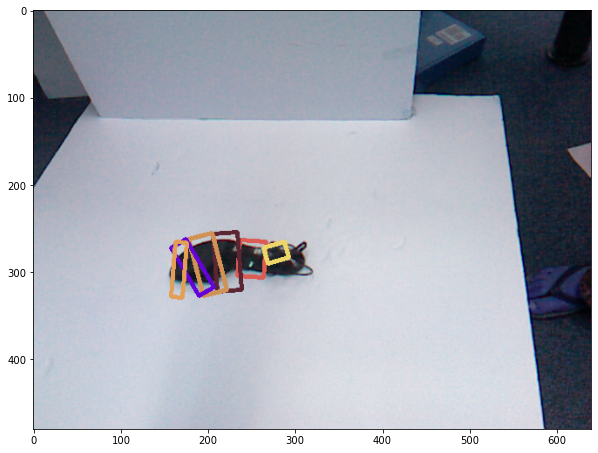

In [10]:
if __name__ == "__main__":
    img = draw_rectangles(rgb_path[13], cpos_path[13])